# *Through this project i would try to predict House Price.*

## Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Uploading Data:

In [2]:
df = pd.read_csv(r'/kaggle/input/housing-dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Checking Null Values:

In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Checking Duplicates:

In [6]:
df.duplicated().any()

False

## Visualizing the Target data with Features:

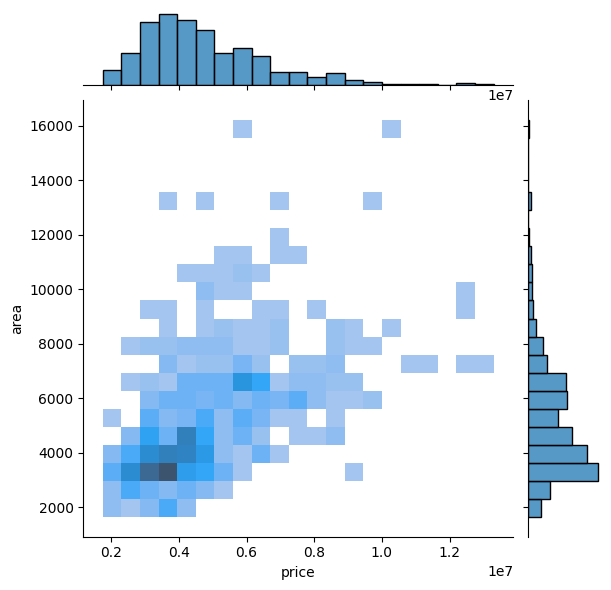

In [7]:
sns.jointplot(data=df, x='price', y='area', kind='hist')
plt.show()

<Axes: xlabel='price', ylabel='area'>

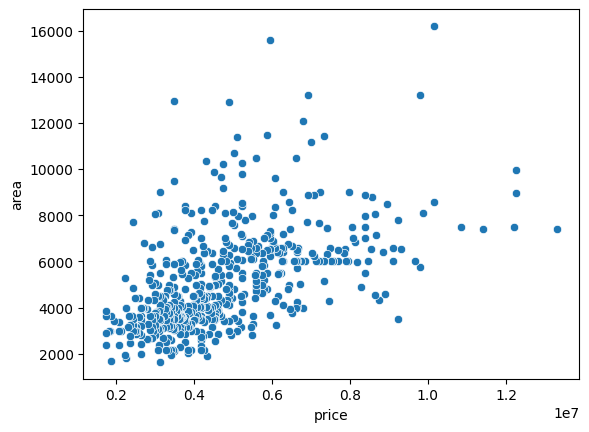

In [8]:
sns.scatterplot(x=df['price'], y=df['area'])

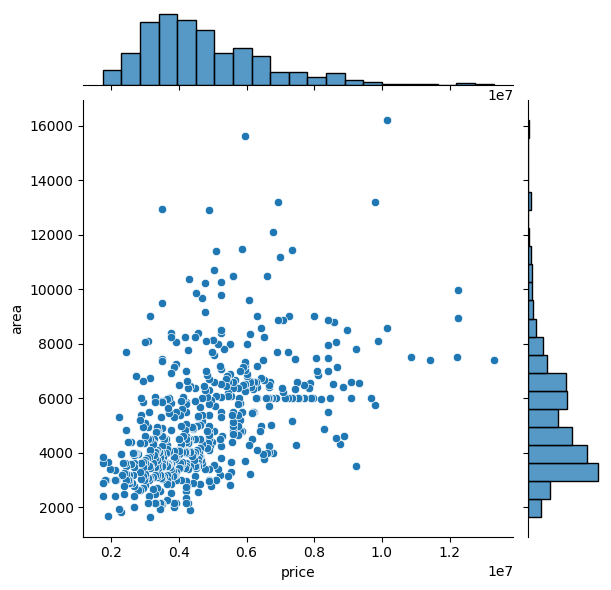

In [9]:
sns.jointplot(data=df, x='price', y='area', kind='scatter')
plt.show()

<Axes: xlabel='price', ylabel='area'>

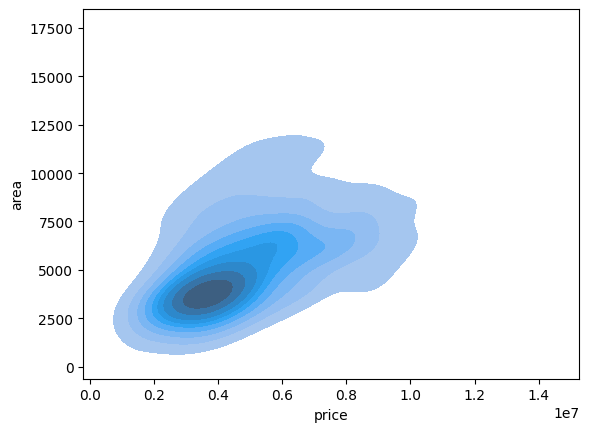

In [10]:
sns.kdeplot(data=df, x='price', y='area', fill=True)

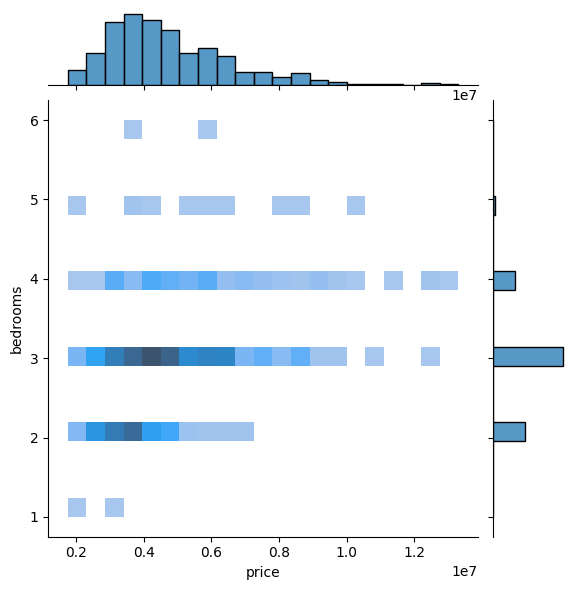

In [11]:
sns.jointplot(data=df, x='price', y='bedrooms', kind='hist')
plt.show()

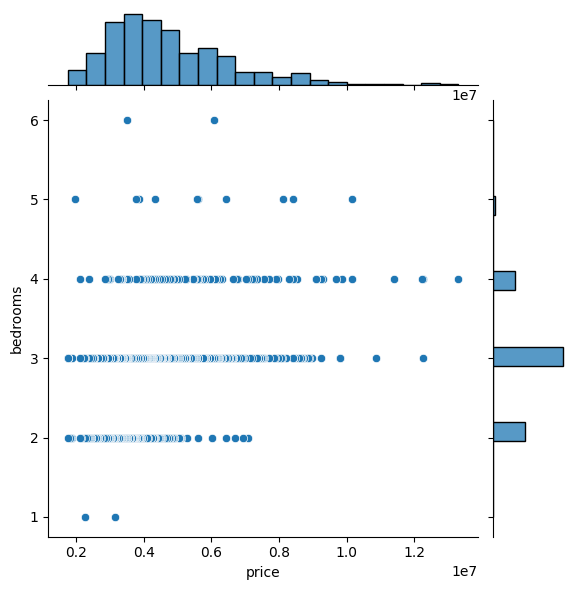

In [12]:
sns.jointplot(data=df, x='price', y='bedrooms', kind='scatter')
plt.show()

<Axes: xlabel='price', ylabel='bedrooms'>

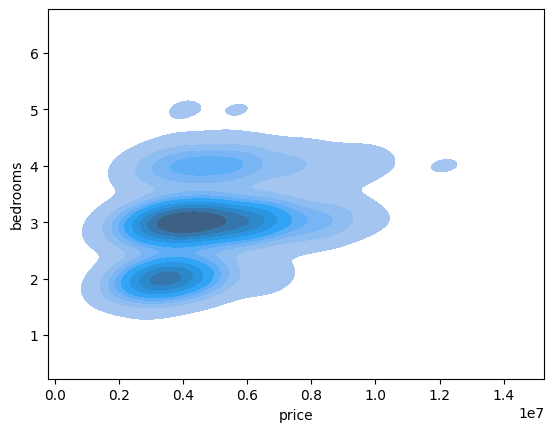

In [13]:
sns.kdeplot(data=df, x='price', y='bedrooms', fill=True)

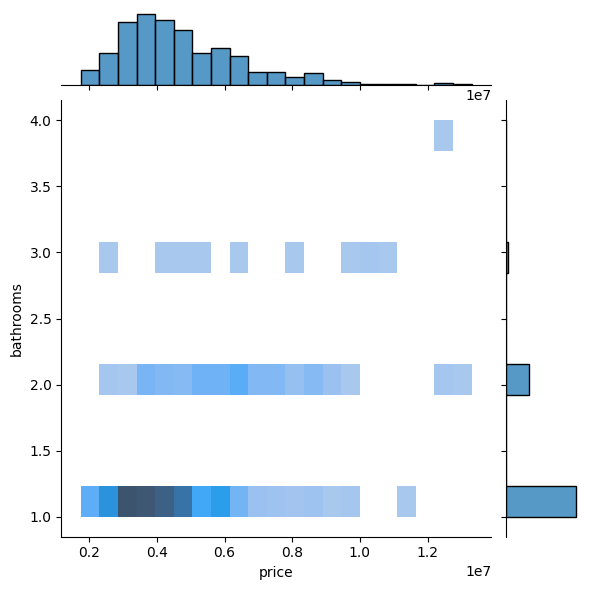

In [14]:
sns.jointplot(data=df, x='price', y='bathrooms', kind='hist')
plt.show()

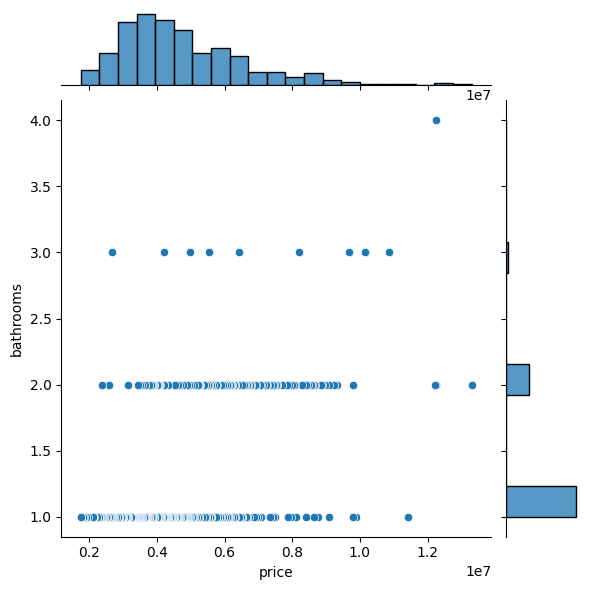

In [15]:
sns.jointplot(data=df, x='price', y='bathrooms', kind='scatter')
plt.show()

<Axes: xlabel='price', ylabel='bathrooms'>

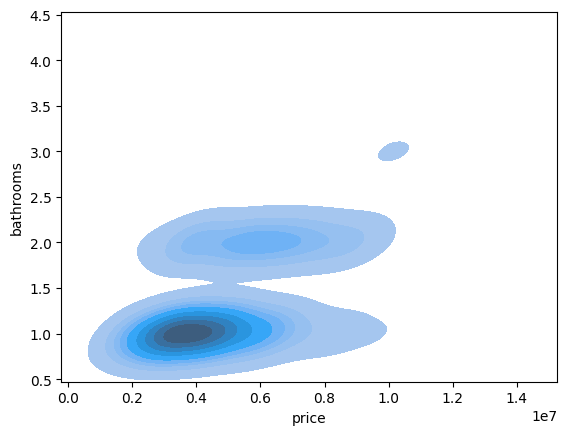

In [16]:
sns.kdeplot(data=df, x='price', y='bathrooms', fill=True)

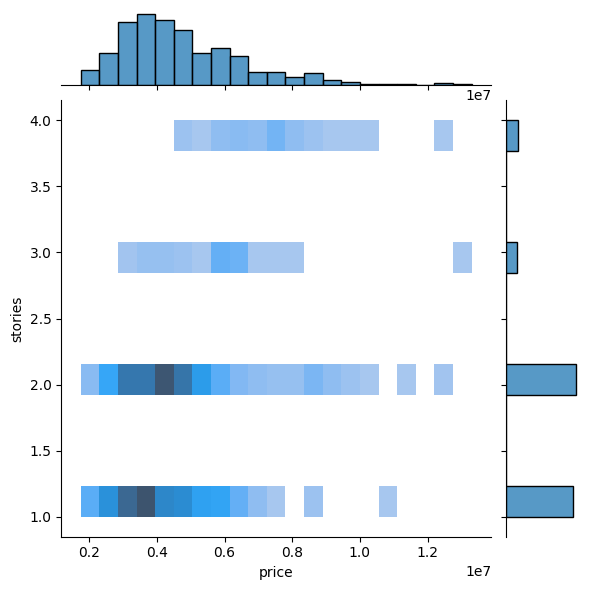

In [17]:
sns.jointplot(data=df, x='price', y='stories', kind='hist')
plt.show()

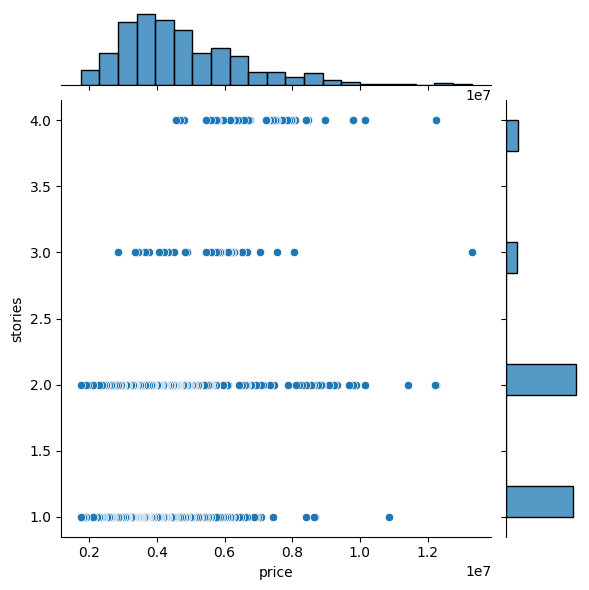

In [18]:
sns.jointplot(data=df, x='price', y='stories', kind='scatter')
plt.show()

<Axes: xlabel='price', ylabel='stories'>

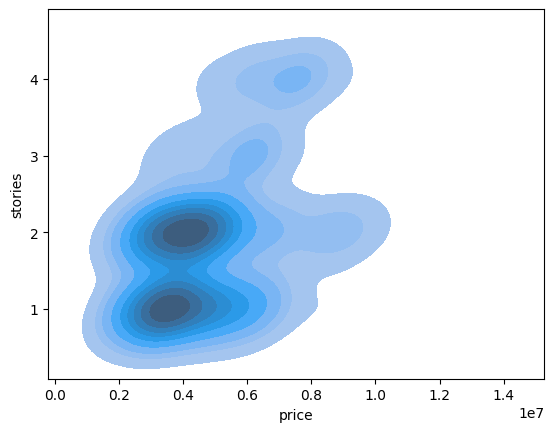

In [19]:
sns.kdeplot(data=df, x='price', y='stories', fill=True) 

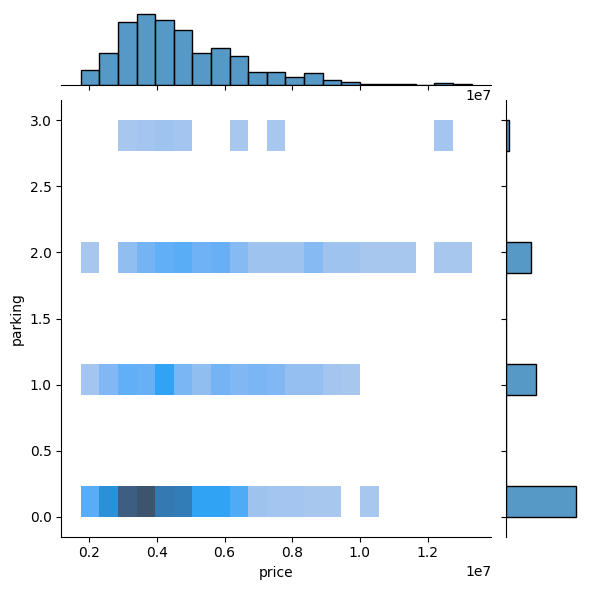

In [20]:
sns.jointplot(data=df, x='price', y='parking', kind='hist')
plt.show()

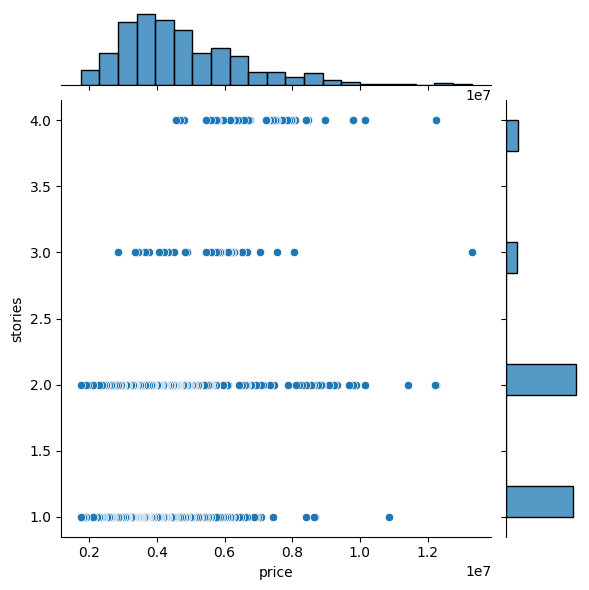

In [21]:
sns.jointplot(data=df, x='price', y='stories', kind='scatter')
plt.show()

<Axes: xlabel='price', ylabel='parking'>

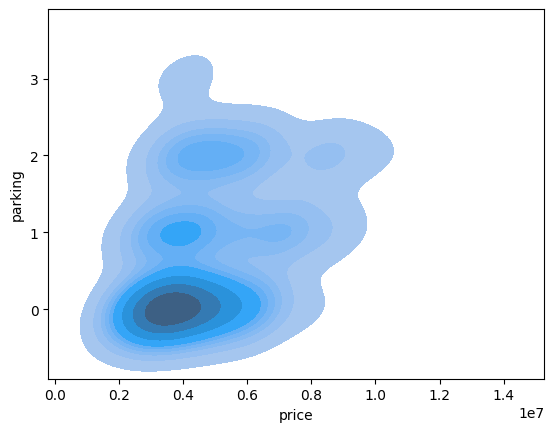

In [22]:
sns.kdeplot(data=df, x='price', y='parking', fill=True) 

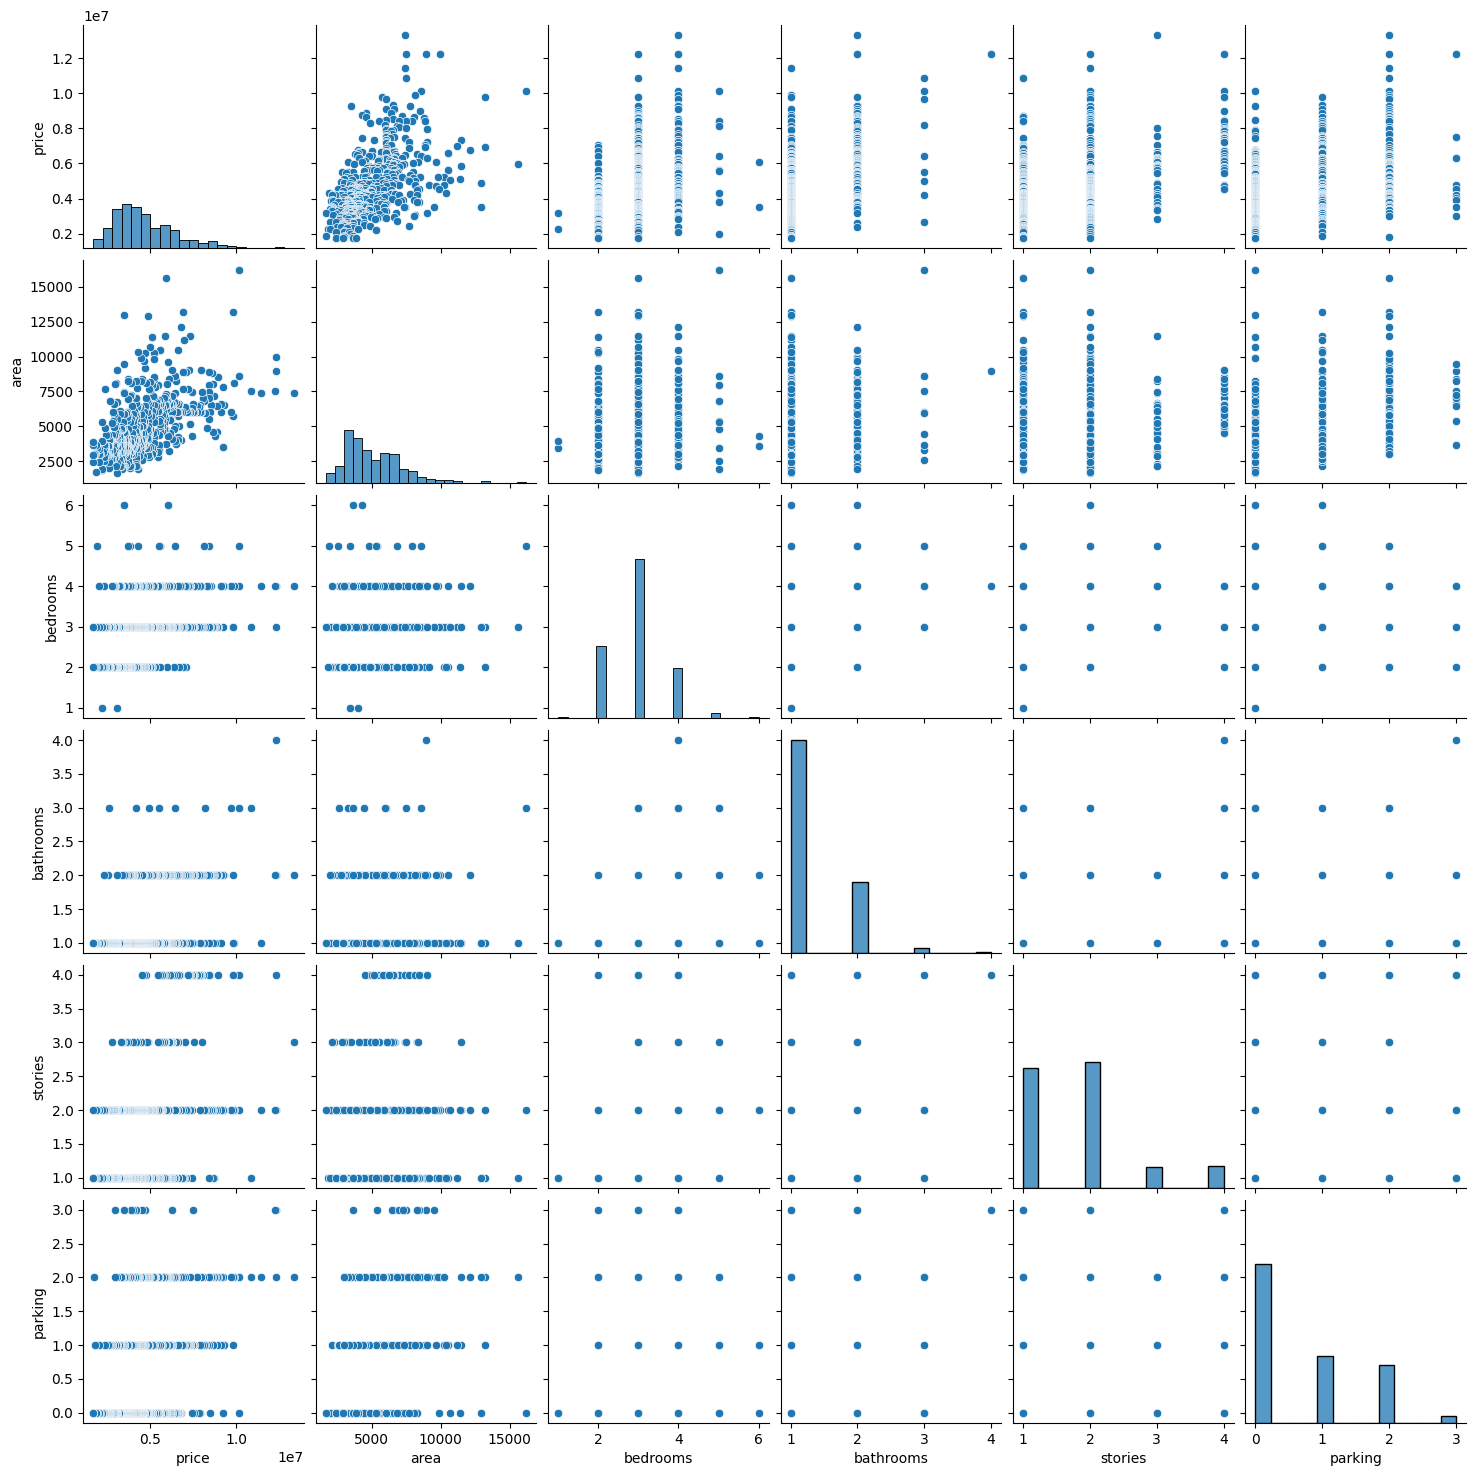

In [23]:
sns.pairplot(df)

## Label Encoding:

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lab_enc = LabelEncoder()

In [26]:
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
lab_enc = LabelEncoder()

for i in col:
    df[i] = lab_enc.fit_transform(df[i] )
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

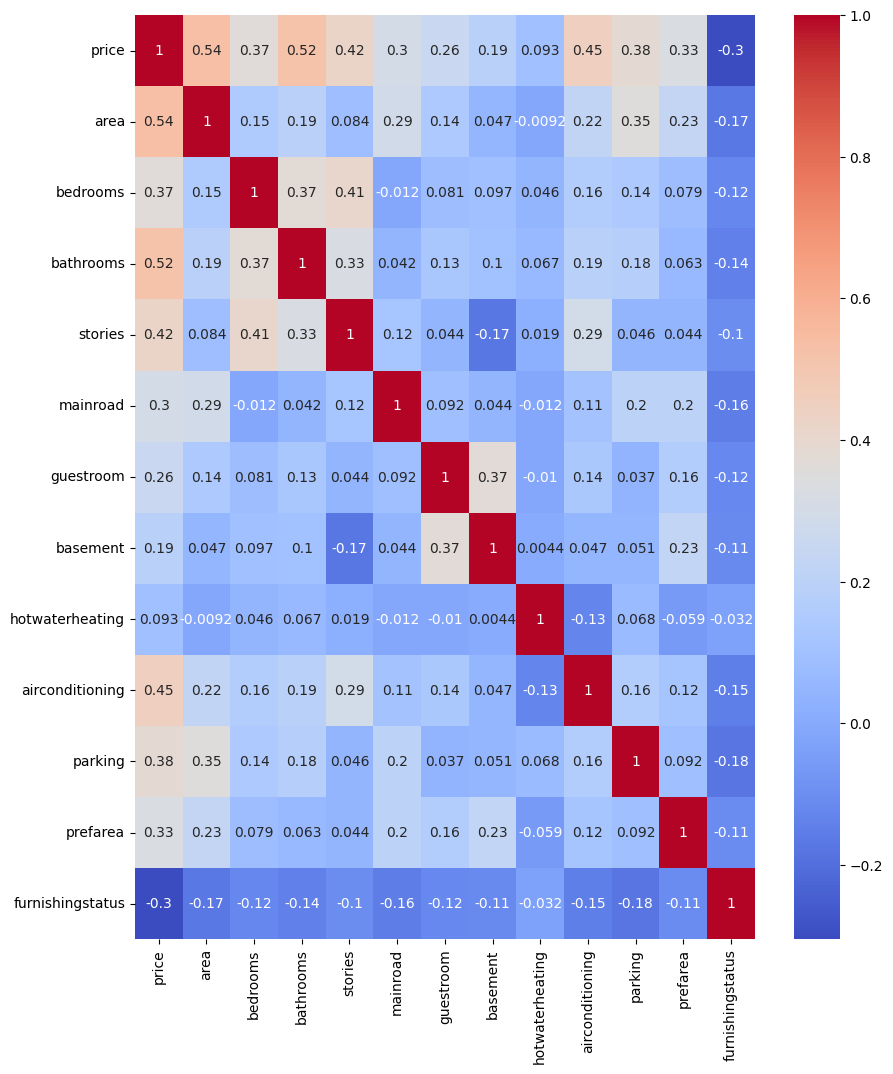

In [27]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Standardising the data:

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std_scaler = StandardScaler()

In [30]:
df_new = pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)
df_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286


## Splitting the data:

In [31]:
target = df_new['price']
feature = df_new.drop('price',axis=1)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

## Building Model:

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_lin = lin_reg.predict(x_test)
r2_lin = r2_score(y_test,y_pred_lin)

<Axes: xlabel='price'>

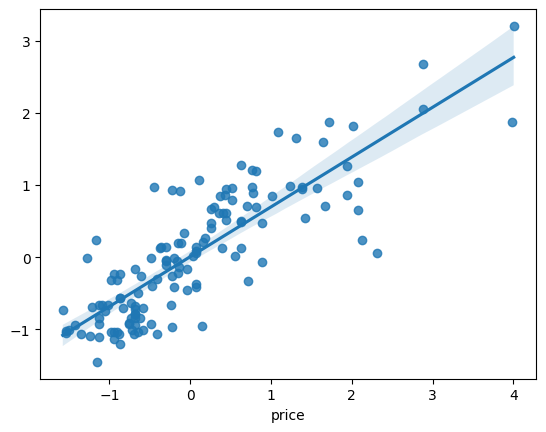

In [34]:
sns.regplot(data = df, x=y_test, y=y_pred_lin)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred_knn)

<Axes: xlabel='price'>

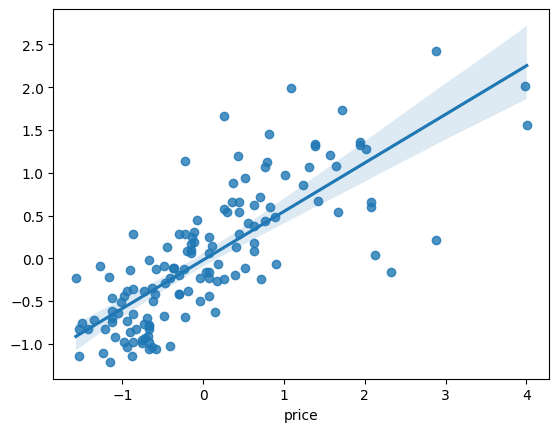

In [36]:
sns.regplot(data=df, x=y_test, y=y_pred_knn)

## *Regplot of both models are almost similar*

## Comparing the "R2 Score" of both model:

In [37]:
data = {'Model': ['Linear Regression', 'KNeighbour Regressor'],'R2_Score': [r2_lin, r2_knn]}
df = pd.DataFrame(data)

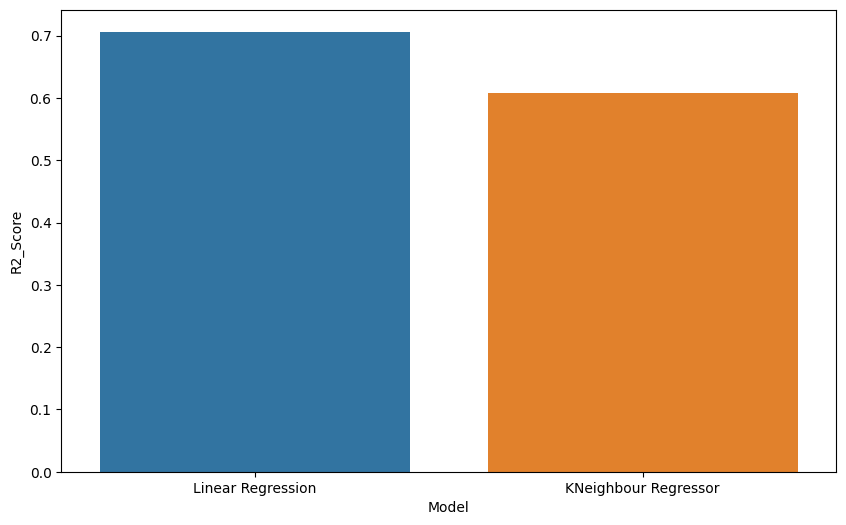

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_Score', data=df)
plt.show()

# *Through this bar plot i observed that Linear Regression is working better than KNN.*